In [178]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [179]:
# loading the data:
raw_data = pd.read_csv('car_price.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [180]:
# By default, only descriptive for numercial variables 
#In order to include the descriptive also for the categorical, I added (include='all')
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,nan,6,nan,nan,4,2,nan,312
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,936,nan,1649,nan,nan,2019,3947,nan,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [181]:
#from the descriptive statistics it can be seen the there is 312 unique 'Model'.
#I assumed that this feature cannot add any valuable information to the regression, therefore, i omitted it.
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,936,nan,1649,nan,nan,2019,3947,nan
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


In [182]:
# searching for null datapoints
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [183]:
# since,I don't want to complete the missing prices,and null values are less than 5% and , I decided to remove them.
data_no_mv = data.dropna(axis=0)

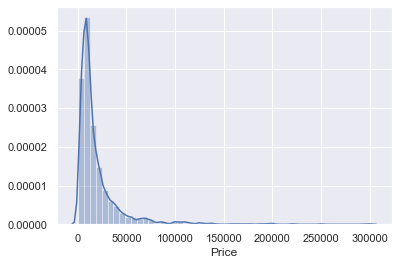

In [184]:
# From probabilty distribtion function it can be seen how price is distributed 
# to spot anomalies from numerical variables
#Price:
sns.distplot(data_no_mv['Price'])

In [209]:
# remove outlayers:
#price:
q = data_no_mv['Price'].quantile(0.99)
data1 = data_no_mv[data_no_mv["Price"]<q]
data1.describe(include='all')
res = data_no_mv[data_no_mv["Price"]>80000]['Price'].count()

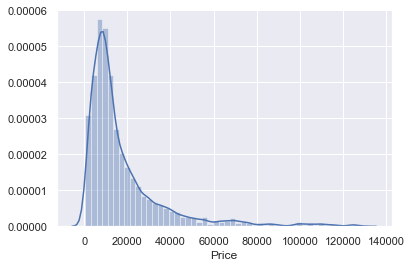

In [210]:
sns.distplot(data1['Price'])

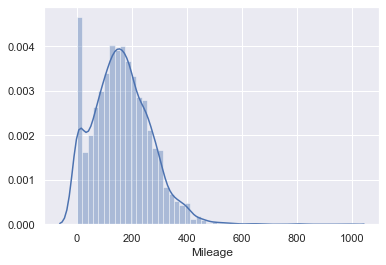

In [211]:
# Mileage:
sns.distplot(data_no_mv['Mileage'])

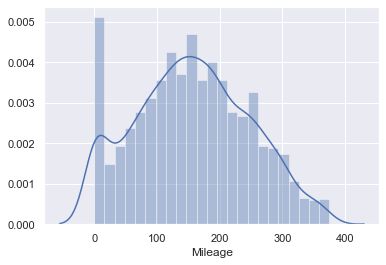

In [212]:
q = data_no_mv['Mileage'].quantile(0.97)
data2 = data1[data1["Mileage"]<q]
sns.distplot(data2['Mileage'])

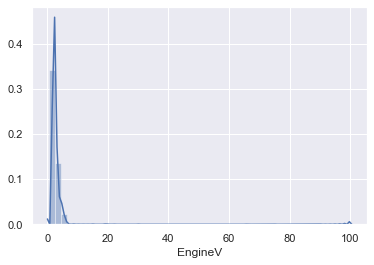

In [213]:
# EngineV:
sns.distplot(data2['EngineV'])

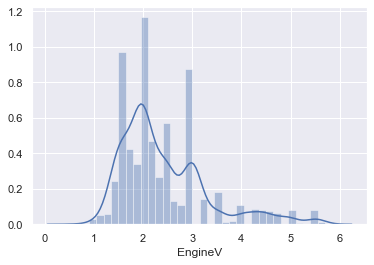

In [214]:
# car engines are likely to be under 6 liters
max_v = 6
data3 = data2[data2['EngineV']<max_v]
sns.distplot(data3['EngineV'])

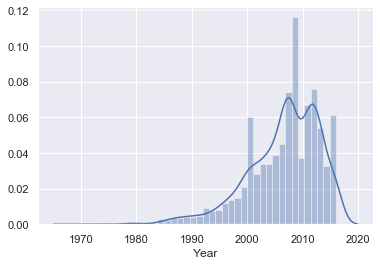

In [215]:
sns.distplot(data3['Year'])

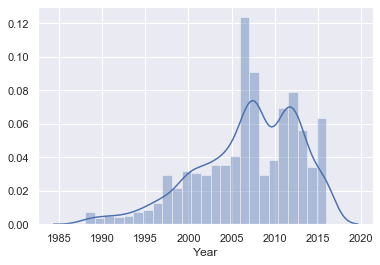

In [216]:
q = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>q]
sns.distplot(data4["Year"])

In [217]:
data_cleaned = data4.reset_index(drop=True)

In [218]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3763.00,3763.00,3763.00,3763.00
mean,18287.75,156.00,2.42,2006.92
std,19065.22,90.39,0.90,5.95
min,800.00,0.00,0.60,1988.00
25%,7400.00,90.00,1.80,2003.00
50%,11800.00,155.00,2.20,2008.00
75%,21900.00,220.00,3.00,2012.00
max,129222.00,375.00,5.70,2016.00


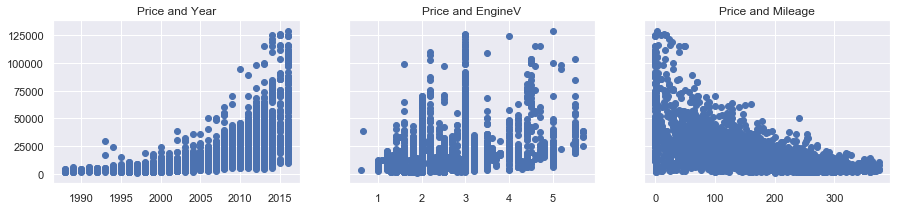

In [219]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

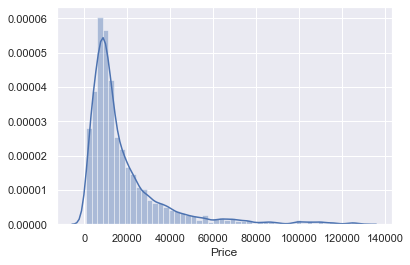

In [220]:
sns.distplot(data_cleaned["Price"])

In [221]:
# the price seemes exponenetially distributed. therefore i'll transform it to to a 'log' price:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log Price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log Price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
2,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
3,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
4,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
5,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,9.29
6,Volkswagen,1400.00,other,212,1.80,Gas,no,1999,7.24
7,Renault,11950.00,vagon,177,1.50,Diesel,yes,2011,9.39
8,Renault,2500.00,sedan,260,1.79,Petrol,yes,1994,7.82
9,Audi,9500.00,vagon,165,2.70,Gas,yes,2003,9.16


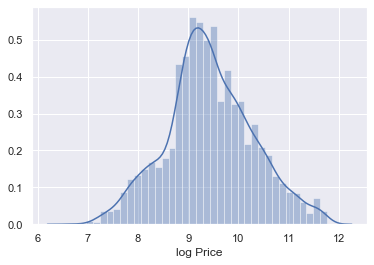

In [222]:
sns.distplot(data_cleaned["log Price"])

In [223]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log Price'], dtype=object)

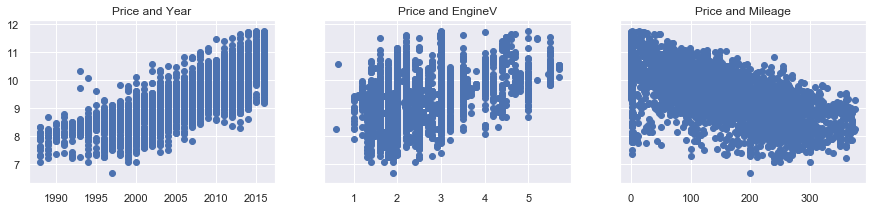

In [224]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [225]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [226]:
# checking Multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [227]:
vif

,VIF,Features
0,3.95,Mileage
1,10.91,Year
2,8.19,EngineV


In [228]:
data_no_multicollineartiy = data_cleaned.drop(['Year'],axis=1)
data_no_multicollineartiy

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log Price
0,BMW,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.50
2,Audi,crossover,240,4.20,Petrol,yes,10.04
3,Toyota,crossover,120,2.00,Petrol,yes,9.81
4,Audi,vagon,200,2.70,Diesel,yes,9.56
5,Renault,vagon,193,1.50,Diesel,yes,9.29
6,Volkswagen,other,212,1.80,Gas,no,7.24
7,Renault,vagon,177,1.50,Diesel,yes,9.39
8,Renault,sedan,260,1.79,Petrol,yes,7.82
9,Audi,vagon,165,2.70,Gas,yes,9.16


In [229]:
data_with_dummies = pd.get_dummies(data_no_multicollineartiy,drop_first=True)
data_with_dummies.shape

(3763, 18)

In [230]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [231]:
# rearange the columns (y- first):
cols= ['log Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.56,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [232]:
# linear regression model:
targets = data_preprocessed['log Price']
inputs = data_preprocessed.drop(['log Price'],axis=1)

In [233]:
#scaling the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [234]:
inputs_scaled = scaler.transform(inputs)

In [236]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size= 0.2, random_state=42)

In [237]:
# create the regression:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
y_hat = reg.predict(x_train)

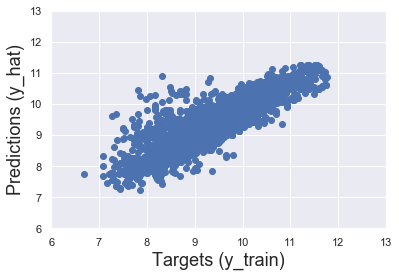

In [239]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'residuals PDF')

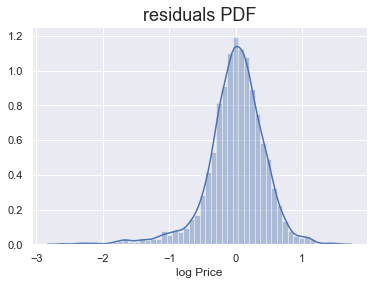

In [240]:
sns.distplot(y_train - y_hat)
plt.title('residuals PDF', size=18)

In [241]:
# R squared
reg.score(x_train,y_train)

0.7425228991700991

In [242]:
reg.intercept_

9.425404406374646

In [243]:
reg.coef_

array([-0.43614753,  0.21128667,  0.01821296,  0.01406737, -0.13596654,
       -0.17564555, -0.05142015, -0.08218497, -0.15281296, -0.10054243,
       -0.19303509, -0.11766936, -0.15851425, -0.12138311, -0.02376593,
       -0.14537191,  0.31967394])

In [244]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.44
1,EngineV,0.21
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.05
7,Brand_Volkswagen,-0.08
8,Body_hatch,-0.15
9,Body_other,-0.10


In [245]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark--> Audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [246]:
y_hat_test = reg.predict(x_test)

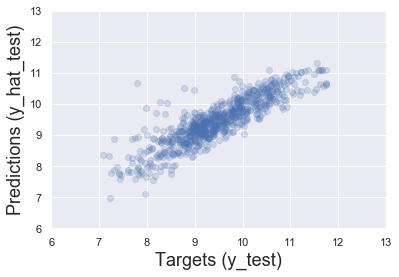

In [247]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [248]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,44039.82
1,5283.39
2,10721.49
3,27323.94
4,4119.03


In [249]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,44039.82,4200.00
1,5283.39,nan
2,10721.49,nan
3,27323.94,nan
4,4119.03,nan
5,17394.21,nan
6,2833.15,nan
7,4591.97,nan
8,45418.87,nan
9,14735.11,nan


In [250]:
y_test = y_test.reset_index(drop=True)

In [251]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [252]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,44039.82,4200.00,-39839.82,948.57
1,5283.39,nan,nan,nan
2,10721.49,nan,nan,nan
3,27323.94,nan,nan,nan
4,4119.03,nan,nan,nan
5,17394.21,nan,nan,nan
6,2833.15,nan,nan,nan
7,4591.97,nan,nan,nan
8,45418.87,nan,nan,nan
9,14735.11,nan,nan,nan


In [253]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,753.00,170.00,170.00,170.00
mean,16524.89,15356.34,-1440.95,147.29
std,12908.89,12640.89,18850.12,224.34
min,1055.26,1200.00,-57838.37,1.22
25%,7991.79,7612.50,-10878.50,38.10
50%,12197.69,10099.50,-131.42,70.70
75%,21253.92,19500.00,7062.08,147.66
max,80838.37,72700.00,64816.50,1388.68


In [254]:
pd.options.display.max_rows = 999 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, I sorted by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
527,6914.63,7000.00,85.37,1.22
387,24176.03,24500.00,323.97,1.32
61,8733.93,9000.00,266.07,2.96
29,9494.47,9800.00,305.53,3.12
511,6848.21,6500.00,-348.21,5.36
670,7697.28,7300.00,-397.28,5.44
274,12657.68,13499.00,841.32,6.23
358,41731.56,44600.00,2868.44,6.43
439,9484.15,8900.00,-584.15,6.56
691,11867.17,12800.00,932.83,7.29


In [ ]:
#the model not giving very good result.
# maybe i missed somthing on the lower pricees or maybe i dont have a crucial information on the lower price cars (maybe they were demeged).
# more work should be done here.